In [12]:
# Import Packages
from ml import *

In [13]:
# Load data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20200904_sample.csv', index_col=0, parse_dates=[1])

In [14]:
data

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag
0,2015-01-02,klant_1,8421,0
1,2015-01-02,klant_2,4547,0
2,2015-01-02,klant_3,13,0
3,2015-01-02,klant_4,0,0
4,2015-01-02,klant_5,0,0
...,...,...,...,...
9835,2019-06-29,klant_2,0,24917
9836,2019-06-29,klant_3,0,20
9837,2019-06-29,klant_4,0,1
9838,2019-06-29,klant_5,0,116


In [24]:
cust_filter = data['cust_id'] == 'klant_5'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()
data = data.set_index(data.procesdag, drop=True) # drop haalt procesdag column weg
data

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag
procesdag,,,,
2016-08-11,2016-08-11,klant_5,0.0,73.0
2016-08-12,2016-08-12,klant_5,73.0,0.0
2016-08-15,2016-08-15,klant_5,1186.0,5177.0
2016-08-16,2016-08-16,klant_5,5177.0,3511.0
2016-08-17,2016-08-17,klant_5,3511.0,1783.0
...,...,...,...,...
2019-06-24,2019-06-24,klant_5,3754.0,1828.0
2019-06-25,2019-06-25,klant_5,1828.0,5270.0
2019-06-26,2019-06-26,klant_5,5270.0,3137.0


In [25]:
data = data['2016-08-11':]

In [26]:
data.procesdag = pd.to_datetime(data.procesdag)

In [27]:
sec = ((data.procesdag).astype(int) / 1e9).astype(int)

In [28]:
min((sec - sec.shift(1)).dropna())
max((sec - sec.shift(1)).dropna())

259200.0

In [29]:
y = data.aantal_pakketten_volgende_dag
X = data[['procesdag', 'aantal_pakketten']]

In [30]:
train_X = X[:7000]
valid_X = X[7000:]
train_y = y[:7000]
valid_y = y[7000:]

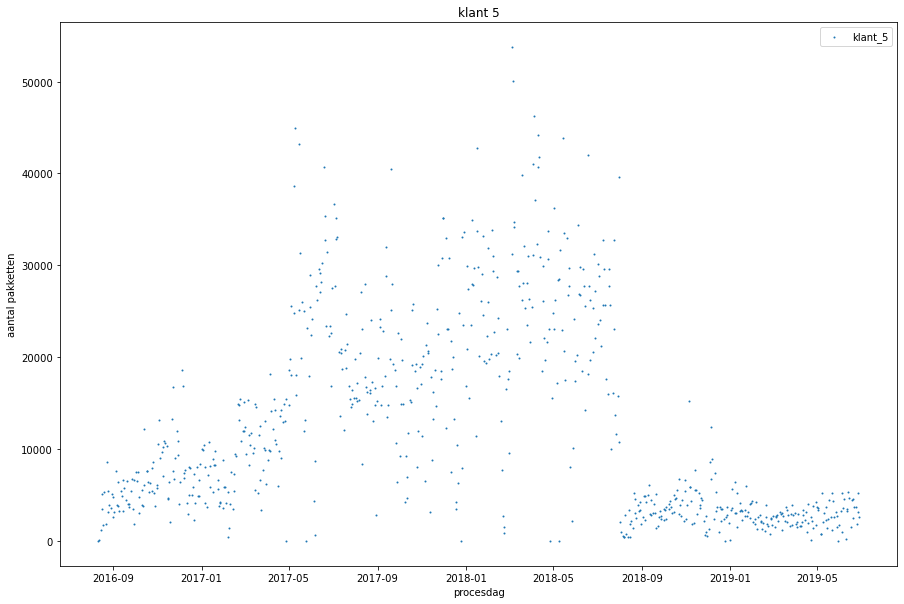

In [31]:
train_X4 = train_X.where(data['cust_id'] == 'klant_5').dropna()
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(train_X4['procesdag'], train_X4.aantal_pakketten, label='klant_5', s=1)

plt.ylabel('aantal pakketten')
plt.xlabel('procesdag')
plt.title('klant 5')
plt.legend();

In [23]:
train_X4

,procesdag,aantal_pakketten
procesdag,,
2016-08-11,2016-08-11,0.0
2016-08-12,2016-08-12,73.0
2016-08-13,2016-08-13,0.0
2016-08-14,2016-08-14,97.0
2016-08-15,2016-08-15,1186.0
...,...,...
2019-06-25,2019-06-25,1828.0
2019-06-26,2019-06-26,5270.0
2019-06-27,2019-06-27,3137.0
